## MACHINE LEARNING INTERNSHIP
8BitWorriors
## WEEK 3 TASK
## Disease Prediction Model
## Data set - "Hypothyorid"
## Created by - Shivansh Hingve

## Imports

In [35]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Read data from csv

In [37]:
df = pd.read_csv("hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

The CSV file in question appears to be inundated with an excessive number of redundant and extraneous columns, rendering it unnecessarily complex and challenging to navigate. These surplus columns not only clutter the dataset but also introduce confusion and inefficiency during data analysis. The presence of superfluous information hampers the file's usability, making it arduous for users to discern relevant data from the overwhelming noise of unnecessary columns. A streamlined and focused dataset, devoid of these extraneous columns, would significantly enhance the file's functionality and improve the overall data processing experience, facilitating more efficient and meaningful analyses.

## Data Cleaning

In [39]:
df.rename(columns={'binaryClass':'Label'},inplace=True)

In [40]:
df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [41]:
df.replace('?',np.nan,inplace=True)

In [42]:
df['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [43]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    df[i] = pd.to_numeric(df[i])
    print(df[i])

0       41.0
1       23.0
2       46.0
3       70.0
4       70.0
        ... 
3767    30.0
3768    68.0
3769    74.0
3770    72.0
3771    64.0
Name: age, Length: 3772, dtype: float64
0       109.0
1         NaN
2       120.0
3         NaN
4        70.0
        ...  
3767      NaN
3768    114.0
3769    105.0
3770     87.0
3771     92.0
Name: FTI, Length: 3772, dtype: float64
0       1.30
1       4.10
2       0.98
3       0.16
4       0.72
        ... 
3767     NaN
3768    1.00
3769    5.10
3770    0.70
3771    1.00
Name: TSH, Length: 3772, dtype: float64
0       2.5
1       2.0
2       NaN
3       1.9
4       1.2
       ... 
3767    NaN
3768    2.1
3769    1.8
3770    2.0
3771    2.2
Name: T3, Length: 3772, dtype: float64
0       125.0
1       102.0
2       109.0
3       175.0
4        61.0
        ...  
3767      NaN
3768    124.0
3769    112.0
3770     82.0
3771     99.0
Name: TT4, Length: 3772, dtype: float64
0       1.14
1        NaN
2       0.91
3        NaN
4       0.87
        ..

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


## Handling Missing Values

In [45]:
#Using sum function to get a count of all null values
df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

However, it's essential to note that filling missing values with the mean assumes that the missing values are missing completely at random (MCAR) or missing at random (MAR). If missingness is related to the data itself (missing not at random), imputing with the mean might introduce bias. In such cases, more sophisticated imputation methods or domain-specific knowledge may be necessary.

In [46]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for x in miss_cols:
    df[x] = df[i].fillna(df[x].mean())
# Now Dropping all NA values
df.dropna(inplace=True)

In [47]:
# Now checking the null values
df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [48]:
df.T4U = df.T4U.astype(int)
df.TT4 = df.TT4.astype(int)
df.FTI = df.FTI.astype(int)
df.age = df.age.astype(int)

# Exploratory Data Analysis

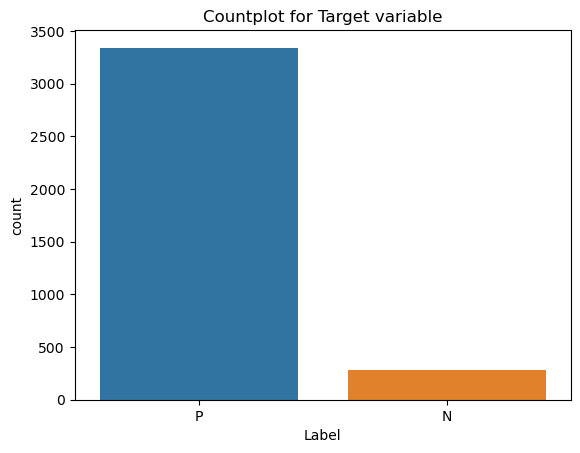

In [49]:
sns.countplot(x = 'Label',data = df)
plt.title("Countplot for Target variable");

In [50]:
# Naming all Positive patients
pos_df = df[df.Label == 'P']

In [51]:
print(df.age)

0       41
1       23
2       46
3       70
4       70
        ..
3767    30
3768    68
3769    74
3770    72
3771    64
Name: age, Length: 3621, dtype: int32


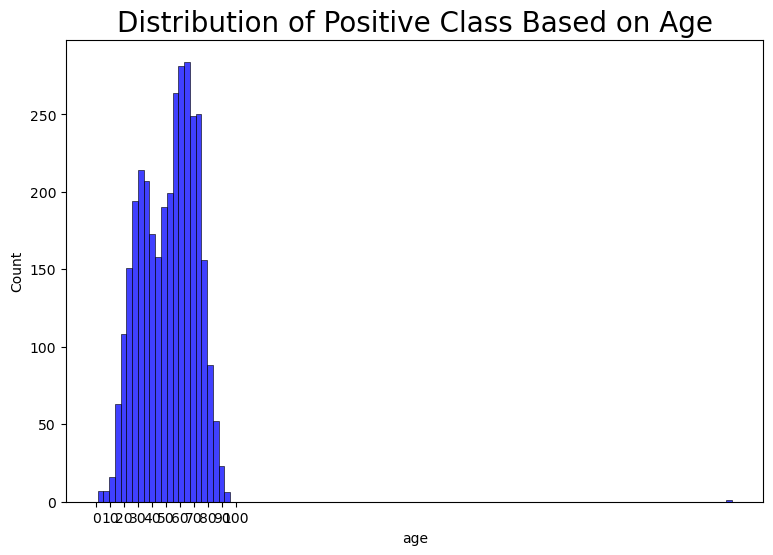

In [52]:
# Plotting them according to their age.
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=pos_df,color='blue')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});

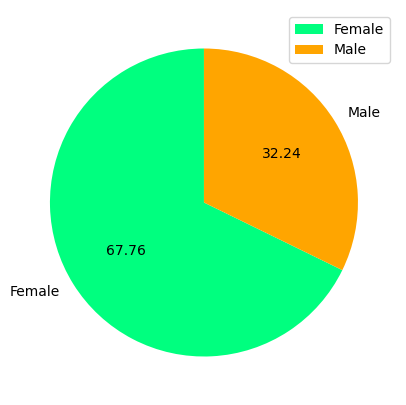

In [53]:
plt.figure(figsize=(5,5))
plt.pie(x=pos_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

## Inference
Female patients who has disease is greater than male patients.

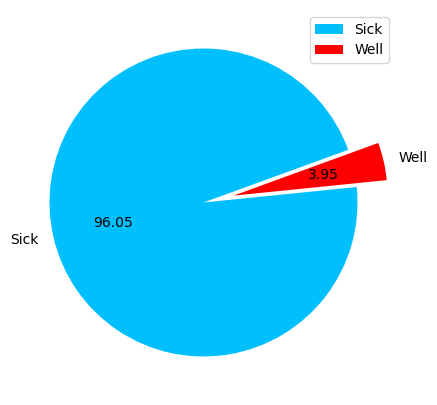

In [54]:
plt.figure(figsize=(5,5))
plt.pie(x=pos_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

## Splitting Data

In [55]:
X = df.drop('Label',axis=1)
y = df.Label

## Transform non-numerical labels to numerical labels.
 Using Transformer

In [56]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()

In [57]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [58]:
def func(df):
    if df == 'P':
        return 1
    else:
        return 0
y= y.apply(func)

## Splitting Data into Training and Test data
use random_state function to get consistency in result of the dataset every time.

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

## Handling Imbalanced Data

In [60]:
smote = SMOTE(random_state=11)

x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [61]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)

Shape before the Oversampling :  (2896, 14)
Shape after the Oversampling :  (5350, 14)


## Normalization 
using MinMaxScaler function.

In [62]:
scalr = MinMaxScaler()
x_smote.TT4 = scalr.fit_transform(x_smote[['TT4']])
x_smote.age = scalr.fit_transform(x_smote[['age']])
x_smote.FTI = scalr.fit_transform(x_smote[['FTI']])

In [69]:
X_test.TT4 = scalr.fit_transform(X_test[['TT4']])
X_test.age = scalr.fit_transform(X_test[['age']])
X_test.FTI = scalr.fit_transform(X_test[['FTI']])

## Model

In [89]:
Model = RandomForestClassifier()

In [90]:
Model.fit(x_smote,y_smote)

RandomForestClassifier()

In [96]:
Score = Model.score(X_test,y_test)
print(f"Accuracy Score is : ",int(Score*100),"%")

Accuracy Score is :  88 %


## Classification Report for the Model

In [101]:
y_pred = Model.predict(X_test)
print("Classification Report for Random Forest Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test,y_pred))

Classification Report for Random Forest Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.09      0.05      0.07        59
           1       0.92      0.95      0.94       666

    accuracy                           0.88       725
   macro avg       0.50      0.50      0.50       725
weighted avg       0.85      0.88      0.87       725



In [106]:
rf = RandomForestClassifier()
rf_1 =rf.fit(x_smote,y_smote)
rf_1.score(X_test,y_test)

0.8662068965517241

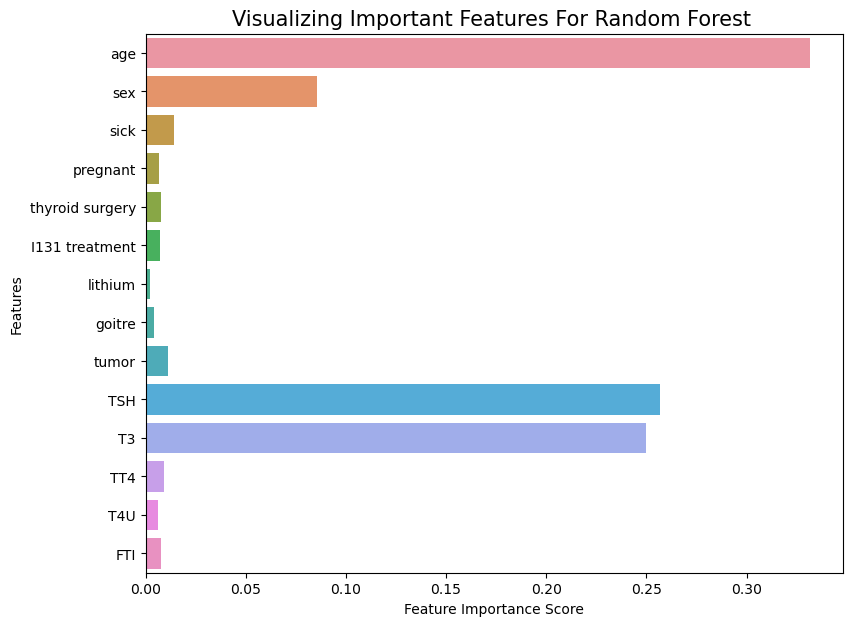

In [104]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest ",{'fontsize':15})
plt.show();